In [5]:
import yfinance as yf

In [18]:
data = yf.download("BZ=F", start="2022-12-07", end="2023-12-07")
data.to_csv("oil_data.csv")

[*********************100%%**********************]  1 of 1 completed


In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [20]:
oil_data = pd.read_csv("oil_data.csv")

In [21]:
oil_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-07,79.790001,80.480003,76.940002,77.169998,77.169998,26919
1,2022-12-08,77.489998,79.180000,75.760002,76.150002,76.150002,33131
2,2022-12-09,76.730003,77.470001,75.110001,76.099998,76.099998,24479
3,2022-12-12,76.669998,78.580002,75.260002,77.989998,77.989998,23020
4,2022-12-13,78.190002,81.279999,78.040001,80.680000,80.680000,30052


In [22]:
# Выбор колонки для анализа
series = oil_data['Close']

# Применение ADF теста
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')

# Интерпретация результатов
if result[0] < result[4]["5%"]:
    print("Ряд стационарен")
else:
    print("Ряд нестационарен")

ADF Statistic: -2.3055859121612623
p-value: 0.1701727323757536
Critical Values 1%: -3.4566744514553016
Critical Values 5%: -2.8731248767783426
Critical Values 10%: -2.5729436702592023
Ряд нестационарен


In [23]:
oil_data['Log_Close'] = np.log(oil_data['Close'])
oil_data['Log_Returns'] = oil_data['Log_Close'].diff()

In [24]:
log_returns = oil_data['Log_Returns'].dropna()

# Применение ADF теста
result = adfuller(log_returns, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')

# Интерпретация результатов
if result[0] < result[4]["5%"]:
    print("Ряд стационарен")
else:
    print("Ряд нестационарен")

ADF Statistic: -10.281323431422758
p-value: 3.772986476128461e-18
Critical Values 1%: -3.4569962781990573
Critical Values 5%: -2.8732659015936024
Critical Values 10%: -2.573018897632674
Ряд стационарен


In [25]:
data = yf.download("RUB=X", start="2022-12-07", end="2023-12-07")
data.to_csv("rub_data.csv")

[*********************100%%**********************]  1 of 1 completed


In [26]:
rub_data = pd.read_csv("rub_data.csv")


In [27]:
rub_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-07,60.514999,63.279999,60.514999,60.514999,60.514999,0
1,2022-12-08,61.965000,62.980099,61.965000,63.464901,63.464901,0
2,2022-12-09,62.035000,62.779999,62.035000,63.365002,63.365002,0
3,2022-12-12,62.480000,63.249500,62.380001,62.480000,62.480000,0
4,2022-12-13,62.625000,63.508499,62.625000,62.625000,62.625000,0


In [28]:
import statsmodels.api as sm

In [31]:
merged_data = pd.merge(oil_data, rub_data, on='Date')

merged_data.head()


,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Log_Close,Log_Returns,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2022-12-07,79.790001,80.480003,76.940002,77.169998,77.169998,26919,4.346011,NaN,60.514999,63.279999,60.514999,60.514999,60.514999,0
1,2022-12-08,77.489998,79.180000,75.760002,76.150002,76.150002,33131,4.332705,-0.013306,61.965000,62.980099,61.965000,63.464901,63.464901,0
2,2022-12-09,76.730003,77.470001,75.110001,76.099998,76.099998,24479,4.332048,-0.000657,62.035000,62.779999,62.035000,63.365002,63.365002,0
3,2022-12-12,76.669998,78.580002,75.260002,77.989998,77.989998,23020,4.356581,0.024532,62.480000,63.249500,62.380001,62.480000,62.480000,0
4,2022-12-13,78.190002,81.279999,78.040001,80.680000,80.680000,30052,4.390491,0.033910,62.625000,63.508499,62.625000,62.625000,62.625000,0


In [73]:
merged_data["OIL_PRICE"] = merged_data['Close_x']
merged_data["USD_PRICE"] = merged_data['Close_y']

X = merged_data['USD_PRICE']
y = merged_data['OIL_PRICE']
X = sm.add_constant(X)  # добавляем константу для интерсепта

model = sm.OLS(y, X).fit()

In [74]:
# Выведите результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              OIL_PRICE   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     50.91
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.04e-11
Time:                        22:18:40   Log-Likelihood:                -761.42
No. Observations:                 252   AIC:                             1527.
Df Residuals:                     250   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7639      2.353     27.948      0.0

In [43]:
oil_data['OIL_LOG_CLOSE'] = np.log(oil_data['Close'])
rub_data["USD_LOG_CLOSE"] = np.log(rub_data['Close'])

log_merged_data = pd.merge(oil_data, rub_data, on='Date')

log_merged_data.head()


,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Log_Close_x,Log_Returns,OIL_LOG_CLOSE,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Log_Close_y,RUB_LOG_CLOSE,USD_LOG_CLOSE
0,2022-12-07,79.790001,80.480003,76.940002,77.169998,77.169998,26919,4.346011,NaN,4.346011,60.514999,63.279999,60.514999,60.514999,60.514999,0,4.102891,4.102891,4.102891
1,2022-12-08,77.489998,79.180000,75.760002,76.150002,76.150002,33131,4.332705,-0.013306,4.332705,61.965000,62.980099,61.965000,63.464901,63.464901,0,4.150487,4.150487,4.150487
2,2022-12-09,76.730003,77.470001,75.110001,76.099998,76.099998,24479,4.332048,-0.000657,4.332048,62.035000,62.779999,62.035000,63.365002,63.365002,0,4.148912,4.148912,4.148912
3,2022-12-12,76.669998,78.580002,75.260002,77.989998,77.989998,23020,4.356581,0.024532,4.356581,62.480000,63.249500,62.380001,62.480000,62.480000,0,4.134846,4.134846,4.134846
4,2022-12-13,78.190002,81.279999,78.040001,80.680000,80.680000,30052,4.390491,0.033910,4.390491,62.625000,63.508499,62.625000,62.625000,62.625000,0,4.137165,4.137165,4.137165


In [44]:
X = log_merged_data['OIL_LOG_CLOSE']
y = log_merged_data['USD_LOG_CLOSE']
X = sm.add_constant(X)  # добавляем константу для интерсепта

model = sm.OLS(y, X).fit()

In [46]:
# Выведите результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          USD_LOG_CLOSE   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     23.13
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.62e-06
Time:                        22:03:01   Log-Likelihood:                 40.389
No. Observations:                 252   AIC:                            -76.78
Df Residuals:                     250   BIC:                            -69.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2155      0.873      0.247

1   -0.013306
2   -0.000657
3    0.024532
4    0.033910
5    0.024729
Name: Log_Returns, dtype: float64
[ 1.00000000e+00  4.49492298e-02 -1.53614988e-02 -1.43252194e-01
  6.09688259e-02 -5.82616922e-03 -1.57571112e-02  9.63461732e-04
  3.47136634e-02 -8.96012272e-02 -8.43945435e-02  6.58248356e-02
  3.06558631e-02 -5.63672135e-02 -1.02163171e-01 -1.02075351e-01
  1.13611409e-02  1.70602943e-03  1.45045815e-01 -3.05064308e-02
  2.00883234e-03 -8.38586414e-02  1.47157375e-02  2.02718891e-02
 -2.71695051e-02  3.08369246e-02  4.11412583e-02  5.60007671e-03
  2.17427736e-02  7.89259557e-02  2.38319290e-02  5.29067082e-02
 -1.82087043e-02  3.97175867e-02  6.65936658e-02 -4.70380074e-03
 -2.77430274e-02 -9.33662045e-03 -1.95479611e-02 -3.73515417e-02
 -5.18112206e-02 -3.04752397e-02 -4.86410359e-02  1.08952123e-02
  1.56209143e-02  1.80912778e-02  8.17625488e-02 -6.28597082e-02
 -6.80635373e-02  1.10211568e-02  2.06945103e-02  4.12180605e-02
 -4.09374431e-02  6.38021771e-03  8.67915352e-02 -1

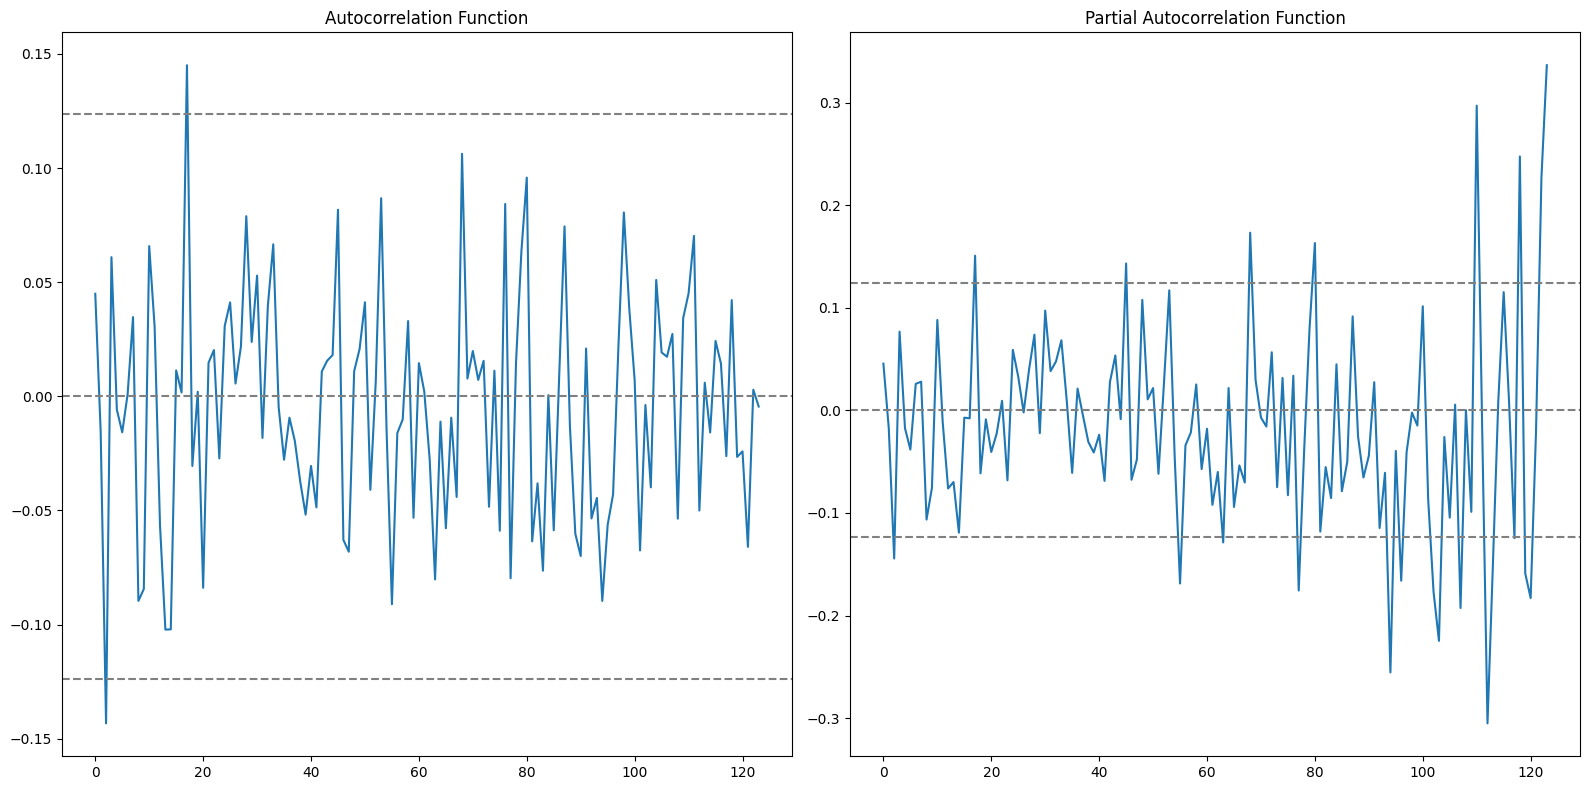

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf


oil_data['Log_Returns'] = oil_data['Log_Returns'].dropna()
kek = oil_data['Log_Returns'].dropna()
print(kek.head())

# Расчет ACF и PACF
lag_acf = acf(kek, nlags=124)
lag_pacf = pacf(kek, nlags=124, method='ols')

# Построение графиков ACF и PACF
plt.figure(figsize=(16, 8))
print(lag_acf)
# График ACF
plt.subplot(121) 
plt.plot(lag_acf[1:])
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(kek)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(kek)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf[1:])
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(kek)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(kek)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()